In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [2]:
monthly = pd.read_excel(open(r"Volve production data.xlsx",'rb'),sheet_name='Monthly Production Data' )

In [3]:
old_names=monthly.columns
new_names=['Wellbore_name', 'NPDCode', 'Year', 'Month', 'On_Stream_Hrs', 'Oil_Sm3', 'Gas_Sm3',
       'Water_Sm3', 'GI_Sm3', 'WI_Sm3']
monthly.rename(columns=dict(zip(old_names, new_names)), inplace=True)
monthly.drop(index=0,inplace=True)

In [4]:
print(monthly.head(5))

  Wellbore_name  NPDCode    Year  Month On_Stream_Hrs  Oil_Sm3      Gas_Sm3  \
1    15/9-F-1 C   7405.0  2014.0    4.0         227.5  11142.5  1.59794e+06   
2    15/9-F-1 C   7405.0  2014.0    5.0       733.833    24902  3.49623e+06   
3    15/9-F-1 C   7405.0  2014.0    6.0       705.917  19617.8  2.88666e+06   
4    15/9-F-1 C   7405.0  2014.0    7.0       742.417  15085.7  2.24937e+06   
5    15/9-F-1 C   7405.0  2014.0    8.0       432.992  6970.43  1.04819e+06   

  Water_Sm3 GI_Sm3 WI_Sm3  
1         0    NaN    NaN  
2    783.48    NaN    NaN  
3   2068.48    NaN    NaN  
4   6243.98    NaN    NaN  
5   4529.75    NaN    NaN  


In [5]:
monthly.drop(columns='GI_Sm3', inplace=True)

In [6]:
monthly['WI_Sm3'].fillna(value=0 , inplace=True)

In [7]:
monthly.head()

,Wellbore_name,NPDCode,Year,Month,On_Stream_Hrs,Oil_Sm3,Gas_Sm3,Water_Sm3,WI_Sm3
1,15/9-F-1 C,7405.0,2014.0,4.0,227.5,11142.5,1.59794e+06,0,0.0
2,15/9-F-1 C,7405.0,2014.0,5.0,733.833,24902,3.49623e+06,783.48,0.0
3,15/9-F-1 C,7405.0,2014.0,6.0,705.917,19617.8,2.88666e+06,2068.48,0.0
4,15/9-F-1 C,7405.0,2014.0,7.0,742.417,15085.7,2.24937e+06,6243.98,0.0
5,15/9-F-1 C,7405.0,2014.0,8.0,432.992,6970.43,1.04819e+06,4529.75,0.0


In [8]:
monthly['Month']=monthly['Month'].astype(int)
monthly['Year']=monthly['Year'].astype(int)       

In [9]:
def numConcat(num1, num2):  
        num1 = str(num1) 
        num2 = str(num2) 
          
        
        num1 += num2 
          
        return int(num1) 

In [10]:
date_format= zip(monthly['Month'],monthly['Year'])
date_string=[]

for x,y in date_format :
    date= numConcat(x,y)
    date_string.append(date)

In [11]:
import datetime

date_final=[]

for item in date_string :
    date_str = str(item)
    format_str = '%m%Y' 
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    date_final.append(datetime_obj)

In [12]:
monthly['Month_Year']=date_final

In [13]:
monthly.groupby('Wellbore_name').first()

,NPDCode,Year,Month,On_Stream_Hrs,Oil_Sm3,Gas_Sm3,Water_Sm3,WI_Sm3,Month_Year
Wellbore_name,,,,,,,,,
15/9-F-1 C,7405.0,2014,4,227.50000,11142.47,1597936.65,0.00,0.0,2014-04-01
15/9-F-11,7078.0,2013,7,112.91514,3923.08,590504.52,0.00,0.0,2013-07-01
15/9-F-12,5599.0,2008,2,406.62499,49091.06,7068009.29,412.61,0.0,2008-02-01
15/9-F-14,5351.0,2008,2,0.00000,0.00,0.00,0.00,0.0,2008-02-01
15/9-F-15 D,7289.0,2014,1,339.91667,5674.63,820968.96,0.00,0.0,2014-01-01
15/9-F-4,5693.0,2007,9,0.00000,NaN,NaN,NaN,0.0,2007-09-01
15/9-F-5,5769.0,2007,9,0.00000,3400.61,538638.56,2380.78,0.0,2007-09-01


In [14]:
monthlyF5 = monthly.groupby('Wellbore_name').get_group('15/9-F-5')
monthlyF4 = monthly.groupby('Wellbore_name').get_group('15/9-F-4')
monthlyF15D = monthly.groupby('Wellbore_name').get_group('15/9-F-15 D')
monthlyF14 = monthly.groupby('Wellbore_name').get_group('15/9-F-14')
monthlyF12 = monthly.groupby('Wellbore_name').get_group('15/9-F-12')
monthlyF11 = monthly.groupby('Wellbore_name').get_group('15/9-F-11')
monthlyF1C = monthly.groupby('Wellbore_name').get_group('15/9-F-1 C')

In [15]:
monthlyF5.drop(columns=['Month','Year'], inplace = True)
monthlyF4.drop(columns=['Month','Year'], inplace = True) 
monthlyF15D.drop(columns=['Month','Year'], inplace = True)
monthlyF14.drop(columns=['Month','Year'], inplace = True) 
monthlyF12.drop(columns=['Month','Year'], inplace = True)
monthlyF11.drop(columns=['Month','Year'], inplace = True)
monthlyF1C.drop(columns=['Month','Year'], inplace = True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
def func(frame) :
    
    
    frame['Total_production'] = frame['Oil_Sm3']+ frame['Water_Sm3'] + frame['Gas_Sm3']
    frame['Cumulated_Oil_Production'] = frame['Oil_Sm3'].cumsum()
    frame['Cumulated_Water_Production'] = frame['Water_Sm3'].cumsum()
    frame['Cumulated_Water_Injection'] = frame['WI_Sm3'].cumsum()
    frame['Cumulated_production'] = frame['Total_production'].cumsum()


In [17]:
func(monthlyF1C)
func(monthlyF5)
func(monthlyF4)
func(monthlyF11)
func(monthlyF12)
func(monthlyF14)
func(monthlyF15D)


<ipython-input-16-a6ff64f7a6fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Total_production'] = frame['Oil_Sm3']+ frame['Water_Sm3'] + frame['Gas_Sm3']
<ipython-input-16-a6ff64f7a6fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Cumulated_Oil_Production'] = frame['Oil_Sm3'].cumsum()
<ipython-input-16-a6ff64f7a6fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [18]:
def plotF(frame) :
    plt.scatter(frame['Month_Year'],frame['Total_production'])
    plt.xlabel("Time")
    plt.ylabel("Production Rate")
    plt.xticks(rotation = 45)
    plt.show()

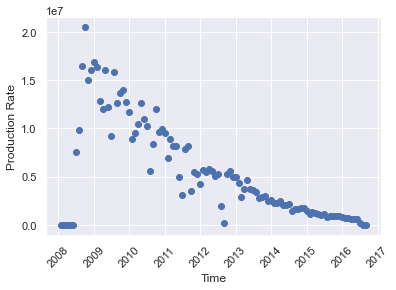

In [19]:
plotF(monthlyF14)